In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing true and fake news
import pandas as pd
true = pandas.read_csv('/content/drive/MyDrive/Ltassigndatafiles/True.csv')
fake = pandas.read_csv('/content/drive/MyDrive/Ltassigndatafiles/Fake.csv')

Exploratory Data Analysis


In [ ]:
true.shape,fake.shape

((21417, 4), (23481, 4))

In [ ]:
#import package

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize,sent_tokenize
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
fake['Label'] = 1
true['Label'] = 0

In [ ]:
data = pd.concat([true,fake],axis=0,ignore_index=True)
print(data.shape)
data.head()

(44898, 5)


,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
data = pd.concat([true,fake],axis=0,ignore_index=True)
print(data.shape)
data.head()

(44898, 5)


,title,text,subject,date,Label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
data['text']=data['title']+data['text']
data=data.drop(['title'], axis=1)

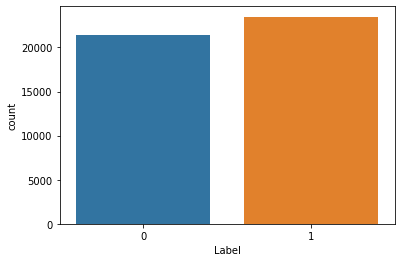

In [ ]:
sns.countplot(data.Label)

In [ ]:
data.isnull().sum()

text       0
subject    0
date       0
Label      0
dtype: int64

Data Cleaning

In [ ]:
def clean_text(text):
    
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('Reuters','',text)
    return text

data['text'] = data['text'].apply(lambda x:clean_text(x))

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Remove Stop Words
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#Lemmatize words
def lemmatize_words(text):
    wnl = nltk.stem.WordNetLemmatizer()
    lem = ' '.join([wnl.lemmatize(word) for word in text.split()])    
    return lem

data['text'] = data['text'].apply(lemmatize_words)

In [ ]:
#Train-Test split
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(data['text'], y,test_size=0.33,random_state=53)

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.values)
count_test = count_vectorizer.transform(X_test.values)
print(count_train.shape)

(30081, 172639)


Using Naive Baiyes

In [ ]:
nb_classifier1 = MultinomialNB()
nb_classifier1.fit(count_train, y_train)

pred1 = nb_classifier1.predict(count_test)

print(classification_report(y_test, pred1, target_names = ['Fake','True']))

              precision    recall  f1-score   support

        Fake       0.95      0.96      0.95      7178
        True       0.96      0.95      0.96      7639

    accuracy                           0.96     14817
   macro avg       0.95      0.96      0.96     14817
weighted avg       0.96      0.96      0.96     14817



Using SVM Model

In [ ]:

from sklearn.svm import SVC

svc_model1 = SVC(C=1, kernel='linear', gamma= 1)
svc_model1.fit(count_train, y_train)

prediction1 = svc_model1.predict(count_test)



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction1, target_names = ['Fake','True']))

              precision    recall  f1-score   support

        Fake       0.99      0.99      0.99      7178
        True       0.99      0.99      0.99      7639

    accuracy                           0.99     14817
   macro avg       0.99      0.99      0.99     14817
weighted avg       0.99      0.99      0.99     14817



Final Verdict:
Accuracy Using Naive Bayes: 96%,
Accuracy Using SVM: 99%